## Amanda Worthy's Bike AQ project notebook in R

## Things to do

1. Make a map of the tracker locations and the air monitering locations
2. Import daylight
3. Agragate w daily/ weekly
4. Import weather (rain) 
5. Look at how AQ is influencing biking

#### Helpful Websites 

Python AQI library
- https://readthedocs.org/projects/python-aqi/downloads/pdf/latest/

Guy who did this already
- https://github.com/jakevdp/SeattleBike/blob/master/SeattleCycling.ipynb

## Load packages

In [126]:
#library(corrplot)
library(data.table)
library(lubridate)
library(ggplot2)
library(reshape2)
library(scales)
library(zoo)
library(plyr)
library(readr)
library(stats)
library(quantmod)
library(dplyr)
library(readxl)
library(ggplot2)
library(tidyverse)
library(data.table)
library(lubridate)
library(ggplot2)
library(reshape2)
library(scales)
library(zoo)
library(plyr)
library(readr)
library(lubridate)
library(reshape2)
library(scales)
library(broom)
invisible(1:13) # hides it
library(repr)
library(tibble)

options(repr.plot.width=8, repr.plot.height=6) #controls plot size in jupyter

# Air Quality Dataset 

### Locations of the AQ monitering sites: 

10th & Weller: 47.597222, -122.319722, 42

Beacon Hill: 47.568214, -122.308619, 334

### Locations of the Bike Counters: 

Freemont: 

Spokane Street Bridge: 

### Locations of the SEA Weather Data: 
LATITUDE: 47.44472

LONGITUDE: -122.31361

ELEVATION [ft]: 427

In [82]:
#import dataset 
df<- read.csv("Data/AW_DataDownload_11_14_22.csv")
head(df)
colnames(df)

Site,Date,ParameterType,ParameterName,Units,UnitsFull,Value
Seattle 10th & Weller,6/11/14 4:00,CO,Carbon Monoxide (Trace CO),ppb,Parts per Million,250.1
Seattle 10th & Weller,6/11/14 5:00,CO,Carbon Monoxide (Trace CO),ppb,Parts per Million,399.0
Seattle 10th & Weller,6/11/14 6:00,CO,Carbon Monoxide (Trace CO),ppb,Parts per Million,637.3
Seattle 10th & Weller,6/11/14 7:00,CO,Carbon Monoxide (Trace CO),ppb,Parts per Million,722.8
Seattle 10th & Weller,6/11/14 8:00,CO,Carbon Monoxide (Trace CO),ppb,Parts per Million,673.2
Seattle 10th & Weller,6/11/14 9:00,CO,Carbon Monoxide (Trace CO),ppb,Parts per Million,594.3


[1] "Site"          "Date"          "ParameterType" "ParameterName"
[5] "Units"         "UnitsFull"     "Value"

In [62]:
unique(df$ParameterType)

[1] CO               NO2              Pm25             Temperature     
[5] WindDirection    WindSpeed        Ozone            SO2             
[9] RelativeHumidity
9 Levels: CO NO2 Ozone Pm25 RelativeHumidity SO2 Temperature ... WindSpeed

In [63]:
unique(df$ParameterName)

[1] Carbon Monoxide (Trace CO) Nitrogen Dioxide (NO2)    
 [3] Pm2.5 MetOne Bam           Pm2.5 Teom FEM            
 [5] Temperature 10 m           Wind Direction Sonic      
 [7] Wind Speed Sonic           Nitrogen Dioxide(NO2_CAPS)
 [9] Ozone (uv abs)             Sulfur Dioxide (Trace SO2)
[11] Relative Humidity          Temperature               
[13] Wind Direction Vane        Wind Speed Propeller      
14 Levels: Carbon Monoxide (Trace CO) ... Wind Speed Sonic

In [96]:
df2= df %>% select(Site, Date, ParameterName, Value)
head(df2)

Site,Date,ParameterName,Value
Seattle 10th & Weller,6/11/14 4:00,Carbon Monoxide (Trace CO),250.1
Seattle 10th & Weller,6/11/14 5:00,Carbon Monoxide (Trace CO),399.0
Seattle 10th & Weller,6/11/14 6:00,Carbon Monoxide (Trace CO),637.3
Seattle 10th & Weller,6/11/14 7:00,Carbon Monoxide (Trace CO),722.8
Seattle 10th & Weller,6/11/14 8:00,Carbon Monoxide (Trace CO),673.2
Seattle 10th & Weller,6/11/14 9:00,Carbon Monoxide (Trace CO),594.3


In [143]:
wide = df2 %>% 
    spread(ParameterName, Value)
#head(wide)
names(wide)[3] <- "CO"
names(wide)[4] <- "NO2"
names(wide)[5] <- "NO2_caps"
names(wide)[6] <- "ozone"
names(wide)[7] <- "PM2.5_MO"
names(wide)[8] <- "PM2.5_FEM"
names(wide)[9] <- "RH"
names(wide)[10] <- "SO2"
names(wide)[11] <- "Temperature"
names(wide)[12] <- "Temperature_10_m"
names(wide)[13] <- "Wind_Direction_s"
names(wide)[14] <- "Wind_Direction_v"
names(wide)[15] <- "Wind_Speed_p"
names(wide)[16] <- "Wind_Speed_s"
head(wide)

Site,Date,CO,NO2,NO2_caps,ozone,PM2.5_MO,PM2.5_FEM,RH,SO2,Temperature,Temperature_10_m,Wind_Direction_s,Wind_Direction_v,Wind_Speed_p,Wind_Speed_s
Seattle 10th & Weller,1/1/15 0:00,699.3,27.86,NA,NA,NA,25.5,NA,NA,NA,32,26,NA,NA,2.8
Seattle 10th & Weller,1/1/15 10:00,572.9,13.06,NA,NA,NA,8.6,NA,NA,NA,34,106,NA,NA,2.9
Seattle 10th & Weller,1/1/15 11:00,738.8,20.25,NA,NA,NA,12.8,NA,NA,NA,37,127,NA,NA,2.9
Seattle 10th & Weller,1/1/15 12:00,1055.1,31.14,NA,NA,NA,19.8,NA,NA,NA,39,221,NA,NA,3.0
Seattle 10th & Weller,1/1/15 13:00,989.5,34.18,NA,NA,NA,16.3,NA,NA,NA,41,226,NA,NA,3.2
Seattle 10th & Weller,1/1/15 14:00,992.7,31.02,NA,NA,NA,15.3,NA,NA,NA,42,225,NA,NA,3.0


# subset weller data (closer to freemont) 


In [98]:
weller <-subset(wide, Site == 'Seattle 10th & Weller')
weller= weller %>% select_if(~ !all(is.na(.)))

head(weller)

Site,Date,CO,NO2,PM2.5_MO,PM2.5_FEM,Temperature_10_m,Wind_Direction_s,Wind_Speed_s
Seattle 10th & Weller,1/1/15 0:00,699.3,27.86,NA,25.5,32,26,2.8
Seattle 10th & Weller,1/1/15 10:00,572.9,13.06,NA,8.6,34,106,2.9
Seattle 10th & Weller,1/1/15 11:00,738.8,20.25,NA,12.8,37,127,2.9
Seattle 10th & Weller,1/1/15 12:00,1055.1,31.14,NA,19.8,39,221,3.0
Seattle 10th & Weller,1/1/15 13:00,989.5,34.18,NA,16.3,41,226,3.2
Seattle 10th & Weller,1/1/15 14:00,992.7,31.02,NA,15.3,42,225,3.0


In [99]:
#Import Freemont Bike Dataset 

fbike<- read.csv("Data/Fremont_Bridge_Bicycle_Counter.csv")
colnames(fbike)

head(fbike)

[1] "Date"                         "Fremont.Bridge.Total"        
[3] "Fremont.Bridge.East.Sidewalk" "Fremont.Bridge.West.Sidewalk"

Date,Fremont.Bridge.Total,Fremont.Bridge.East.Sidewalk,Fremont.Bridge.West.Sidewalk
8/1/22 0:00,23,7,16
8/1/22 1:00,12,5,7
8/1/22 2:00,3,0,3
8/1/22 3:00,5,2,3
8/1/22 4:00,10,2,8
8/1/22 5:00,27,5,22


# Freemont Bridge and AQ in FAQ

In [100]:
# Merge Bike and Weather Data for Freemont

faq <- merge(fbike, weller, by="Date")
head(faq)

Date,Fremont.Bridge.Total,Fremont.Bridge.East.Sidewalk,Fremont.Bridge.West.Sidewalk,Site,CO,NO2,PM2.5_MO,PM2.5_FEM,Temperature_10_m,Wind_Direction_s,Wind_Speed_s
1/1/15 0:00,13,4,9,Seattle 10th & Weller,699.3,27.86,NA,25.5,32,26,2.8
1/1/15 10:00,30,23,7,Seattle 10th & Weller,572.9,13.06,NA,8.6,34,106,2.9
1/1/15 11:00,46,26,20,Seattle 10th & Weller,738.8,20.25,NA,12.8,37,127,2.9
1/1/15 12:00,58,33,25,Seattle 10th & Weller,1055.1,31.14,NA,19.8,39,221,3.0
1/1/15 13:00,88,65,23,Seattle 10th & Weller,989.5,34.18,NA,16.3,41,226,3.2
1/1/15 14:00,119,66,53,Seattle 10th & Weller,992.7,31.02,NA,15.3,42,225,3.0


In [101]:
faq[, c(2:4,6:12)] <- sapply(faq [, c(2:4,6:12)], as.numeric)
head(faq)

Date,Fremont.Bridge.Total,Fremont.Bridge.East.Sidewalk,Fremont.Bridge.West.Sidewalk,Site,CO,NO2,PM2.5_MO,PM2.5_FEM,Temperature_10_m,Wind_Direction_s,Wind_Speed_s
1/1/15 0:00,13,4,9,Seattle 10th & Weller,699.3,27.86,NA,25.5,32,26,2.8
1/1/15 10:00,30,23,7,Seattle 10th & Weller,572.9,13.06,NA,8.6,34,106,2.9
1/1/15 11:00,46,26,20,Seattle 10th & Weller,738.8,20.25,NA,12.8,37,127,2.9
1/1/15 12:00,58,33,25,Seattle 10th & Weller,1055.1,31.14,NA,19.8,39,221,3.0
1/1/15 13:00,88,65,23,Seattle 10th & Weller,989.5,34.18,NA,16.3,41,226,3.2
1/1/15 14:00,119,66,53,Seattle 10th & Weller,992.7,31.02,NA,15.3,42,225,3.0


In [165]:
sumfaq <- summary(faq)
print(sumfaq)

           Date       Fremont.Bridge.Total Fremont.Bridge.East.Sidewalk
 1/1/15 0:00 :    1   Min.   :   0.0       Min.   :  0.00              
 1/1/15 10:00:    1   1st Qu.:  13.0       1st Qu.:  5.00              
 1/1/15 11:00:    1   Median :  61.0       Median : 27.00              
 1/1/15 12:00:    1   Mean   : 109.1       Mean   : 47.52              
 1/1/15 13:00:    1   3rd Qu.: 147.0       3rd Qu.: 66.00              
 1/1/15 14:00:    1   Max.   :1097.0       Max.   :584.00              
 (Other)     :72445   NA's   :10           NA's   :10                  
 Fremont.Bridge.West.Sidewalk                    Site             CO        
 Min.   :  0.00               Seattle 10th & Weller:72451   Min.   :-500.1  
 1st Qu.:  7.00               Seattle Beacon Hill  :    0   1st Qu.: 278.8  
 Median : 32.00                                             Median : 397.4  
 Mean   : 61.58                                             Mean   : 440.5  
 3rd Qu.: 79.00                        

Warning message:
“Removed 24967 rows containing missing values (geom_point).”

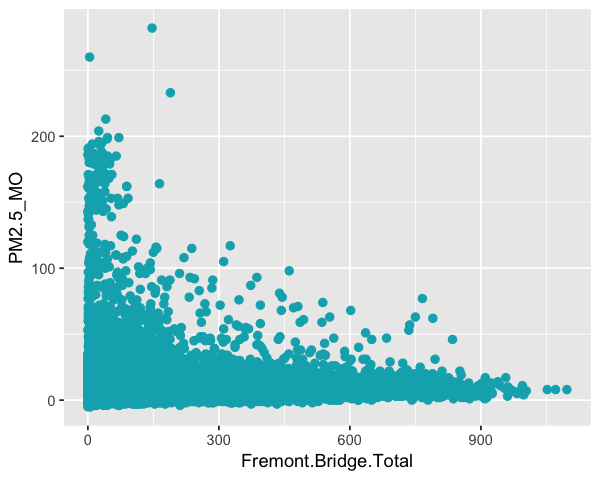

In [102]:
ggplot(data = faq, aes(x = Fremont.Bridge.Total, y = PM2.5_MO))+
  geom_point(color = "#00AFBB", size = 2)

# subset beacon data (closer to SS) 


In [166]:
beacon <-subset(wide, Site == 'Seattle Beacon Hill')
beacon= beacon %>% select_if(~ !all(is.na(.)))

head(beacon)

,Site,Date,CO,NO2_caps,ozone,PM2.5_MO,PM2.5_FEM,RH,SO2,Temperature,Temperature_10_m,Wind_Direction_s,Wind_Direction_v,Wind_Speed_p,Wind_Speed_s
73523,Seattle Beacon Hill,1/1/12 0:00,NA,NA,0.01,NA,10.3,71,NA,40,NA,NA,114,3.0,NA
73524,Seattle Beacon Hill,1/1/12 10:00,NA,NA,0.00,NA,6.9,69,NA,46,NA,NA,318,2.4,NA
73525,Seattle Beacon Hill,1/1/12 11:00,NA,NA,0.00,NA,5.1,67,NA,47,NA,NA,314,3.6,NA
73526,Seattle Beacon Hill,1/1/12 12:00,NA,NA,0.01,NA,5.4,58,NA,50,NA,NA,306,3.4,NA
73527,Seattle Beacon Hill,1/1/12 13:00,NA,NA,0.01,NA,3.9,51,NA,53,NA,NA,354,1.7,NA
73528,Seattle Beacon Hill,1/1/12 14:00,NA,NA,0.01,NA,3.5,51,NA,53,NA,NA,350,1.8,NA


In [167]:
#Import Spokane Street Bike Dataset 
ssbike<- read.csv("Data/Spokane_St_Bridge_Bicycle_Counter.csv")


head(ssbike)
colnames(ssbike)


Date,Spokane.St..Bridge.Total,West,East
6/1/20 0:00,2,2,0
6/1/20 1:00,1,0,1
6/1/20 2:00,2,2,0
6/1/20 3:00,1,0,1
6/1/20 4:00,3,1,2
6/1/20 5:00,36,5,31


[1] "Date"                     "Spokane.St..Bridge.Total"
[3] "West"                     "East"

# Spoakane Bridge and AQ in SAQ

In [156]:
saq <- merge(ssbike,beacon, by="Date")
colnames(saq)

saq= saq %>% select_if(~ !all(is.na(.)))
saq[, c(2:4,6:18)] <- sapply(saq [, c(2:4,6:18)], as.numeric)

head(saq)

[1] "Date"                     "Spokane.St..Bridge.Total"
 [3] "West"                     "East"                    
 [5] "Site"                     "CO"                      
 [7] "NO2_caps"                 "ozone"                   
 [9] "PM2.5_MO"                 "PM2.5_FEM"               
[11] "RH"                       "SO2"                     
[13] "Temperature"              "Temperature_10_m"        
[15] "Wind_Direction_s"         "Wind_Direction_v"        
[17] "Wind_Speed_p"             "Wind_Speed_s"

Date,Spokane.St..Bridge.Total,West,East,Site,CO,NO2_caps,ozone,PM2.5_MO,PM2.5_FEM,RH,SO2,Temperature,Temperature_10_m,Wind_Direction_s,Wind_Direction_v,Wind_Speed_p,Wind_Speed_s
1/1/14 0:00,0,0,0,Seattle Beacon Hill,NA,NA,NA,NA,11.3,NA,NA,NA,NA,NA,NA,NA,NA
1/1/14 10:00,17,6,11,Seattle Beacon Hill,NA,NA,0.01,NA,5.1,100,NA,39,NA,NA,54,0.8,NA
1/1/14 11:00,35,18,17,Seattle Beacon Hill,NA,NA,0.00,NA,8.3,100,NA,40,NA,NA,70,1.2,NA
1/1/14 12:00,28,12,16,Seattle Beacon Hill,NA,NA,0.01,NA,9.3,100,NA,41,NA,NA,125,1.2,NA
1/1/14 13:00,24,12,12,Seattle Beacon Hill,NA,NA,0.00,NA,11.8,100,NA,42,NA,NA,360,1.3,NA
1/1/14 14:00,40,18,22,Seattle Beacon Hill,NA,NA,0.00,NA,13.3,100,NA,42,NA,NA,329,2.0,NA


In [158]:
dim(saq)

[1] 74794    18

Warning message:
“Removed 53280 rows containing missing values (geom_point).”

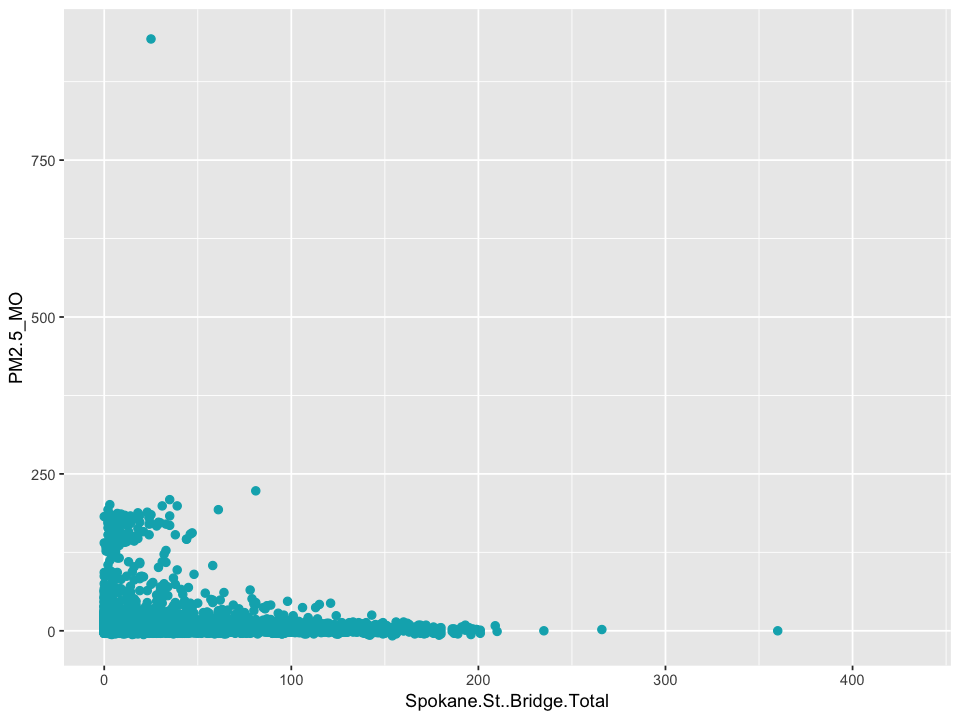

In [159]:
ggplot(data = saq, aes(x = Spokane.St..Bridge.Total, y = PM2.5_MO))+
  geom_point(color = "#00AFBB", size = 2)

In [148]:
colnames(saq)

[1] "Date"                     "Spokane.St..Bridge.Total"
 [3] "West"                     "East"                    
 [5] "Site"                     "CO"                      
 [7] "NO2_caps"                 "ozone"                   
 [9] "PM2.5_MO"                 "PM2.5_FEM"               
[11] "RH"                       "SO2"                     
[13] "Temperature"              "Temperature_10_m"        
[15] "Wind_Direction_s"         "Wind_Direction_v"        
[17] "Wind_Speed_p"             "Wind_Speed_s"

In [163]:
saq2= saq %>% 
  select('Spokane.St..Bridge.Total', 'PM2.5_MO','CO', 'RH', 'SO2','ozone',)
#head(saq2)

saq2= drop_na(saq2)

corr_all<- round(cor(saq2, method = c("spearman")), 3)
corr_all
#corrplot(corr_all, type="upper")


,Spokane.St..Bridge.Total,PM2.5_MO,CO,RH,SO2,ozone
Spokane.St..Bridge.Total,1.000,-0.057,0.024,-0.440,0.215,0.099
PM2.5_MO,-0.057,1.000,0.468,-0.019,0.259,-0.362
CO,0.024,0.468,1.000,0.170,0.197,-0.495
RH,-0.440,-0.019,0.170,1.000,-0.226,-0.394
SO2,0.215,0.259,0.197,-0.226,1.000,-0.268
ozone,0.099,-0.362,-0.495,-0.394,-0.268,1.000


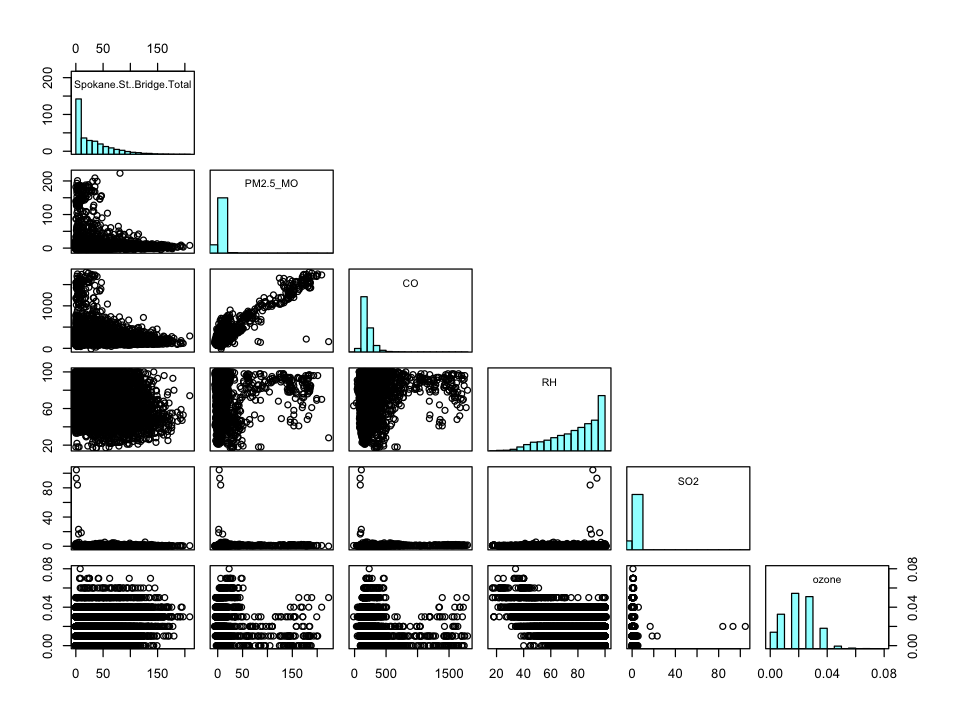

In [164]:
# Function to add histograms
panel.hist <- function(x, ...) {
    usr <- par("usr")
    on.exit(par(usr))
    par(usr = c(usr[1:2], 0, 1.5))
    his <- hist(x, plot = FALSE)
    breaks <- his$breaks
    nB <- length(breaks)
    y <- his$counts
    y <- y/max(y)
    rect(breaks[-nB], 0, breaks[-1], y, col = rgb(0, 1, 1, alpha = 0.5), ...)
    # lines(density(x), col = 2, lwd = 2) # Uncomment to add density lines
}

# Creating the scatter plot matrix
pairs(saq2,
      upper.panel = NULL,         # Disabling the upper panel
      diag.panel = panel.hist)    # Adding the histograms